## 1. Reading and viewing the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Capstone_1_project/listings_summary.csv')
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42


In [3]:
# To check shape
print("This dataset has {} rows and {} columns.".format(*df.shape))

# To Check duplicates
print("It contains {} duplicates.".format(df.duplicated().sum()))

This dataset has 22552 rows and 96 columns.
It contains 0 duplicates.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 96 columns):
id                                  22552 non-null int64
listing_url                         22552 non-null object
scrape_id                           22552 non-null int64
last_scraped                        22552 non-null object
name                                22493 non-null object
summary                             21589 non-null object
space                               14020 non-null object
description                         22349 non-null object
experiences_offered                 22552 non-null object
neighborhood_overview               11540 non-null object
notes                               7215 non-null object
transit                             13036 non-null object
access                              10837 non-null object
interaction                         10406 non-null object
house_rules                         11449 non-null object
thumbnail_url           

In [5]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
df.index

RangeIndex(start=0, stop=22552, step=1)

## 2. Preprocessing the Data

Usually, fixed features of the property include the rooms/size/location etc. We also can decide on how we want to be listed: with a picture or not, how many minimum nights we want a guest to stay, whether we are instantly bookable, how we handle cancellations, etc. But we can neither be a "super host", nor do we have any reviews yet to show - although they can be very important for setting a price. So, let's focus only on features we can influence:

In [7]:
# keeping the columns that we will need

data_columns_needed= ['id', 'space', 'description', 'host_has_profile_pic', 'neighbourhood_group_cleansed', 
                   'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',  
                   'bedrooms', 'bed_type', 'amenities', 'square_feet', 'price', 'cleaning_fee', 
                   'security_deposit', 'extra_people', 'guests_included', 'minimum_nights',  
                   'instant_bookable', 'is_business_travel_ready', 'cancellation_policy','host_is_superhost']

df_revised_columns = df[data_columns_needed].set_index('id')
df_revised_columns.head()

,space,description,host_has_profile_pic,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,price,cleaning_fee,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,host_is_superhost
id,,,,,,,,,,,,,,,,,,,,,
2015,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,t,Mitte,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,...,$60.00,$30.00,$200.00,$28.00,1,4,f,f,strict_14_with_grace_period,t
2695,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,t,Pankow,52.548513,13.404553,Apartment,Private room,2,1.0,...,$17.00,$0.00,$0.00,$0.00,1,2,f,f,flexible,f
3176,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,t,Pankow,52.534996,13.417579,Apartment,Entire home/apt,4,1.0,...,$90.00,$50.00,$200.00,$20.00,2,62,t,f,strict_14_with_grace_period,f
3309,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,t,Tempelhof - Schöneberg,52.498855,13.349065,Apartment,Private room,2,1.0,...,$26.00,$30.00,$250.00,$18.00,1,5,f,f,strict_14_with_grace_period,f
7071,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,t,Pankow,52.543157,13.415091,Apartment,Private room,2,1.0,...,$42.00,$0.00,$0.00,$24.00,1,2,f,f,moderate,t


In [8]:
df_revised_columns.shape

(22552, 24)

In [9]:
# To check how many NaN's each column is having
df_revised_columns.isna().sum()

space                            8532
description                       203
host_has_profile_pic               26
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          32
bedrooms                           18
bed_type                            0
amenities                           0
square_feet                     22106
price                               0
cleaning_fee                     7146
security_deposit                 9361
extra_people                        0
guests_included                     0
minimum_nights                      0
instant_bookable                    0
is_business_travel_ready            0
cancellation_policy                 0
host_is_superhost                  26
dtype: int64

We can look at different room types of what we are dealing with, since this maybe an important feature in detecting the price.

In [10]:
room_type = df['room_type'].value_counts(normalize=True)
room_type

Private room       0.511440
Entire home/apt    0.475435
Shared room        0.013125
Name: room_type, dtype: float64

Also, we would like to see how many property types are we up against and how many we are dealing with

In [11]:
property_type = df['property_type'].value_counts(normalize=True)
property_type

Apartment                 0.896816
Condominium               0.027137
Loft                      0.020397
House                     0.017648
Serviced apartment        0.007760
Hostel                    0.005676
Townhouse                 0.004390
Guest suite               0.003281
Bed and breakfast         0.002838
Guesthouse                0.002527
Hotel                     0.002217
Other                     0.002084
Boutique hotel            0.001907
Bungalow                  0.000887
Boat                      0.000754
Tiny house                0.000532
Houseboat                 0.000488
Camper/RV                 0.000488
Villa                     0.000443
Pension (South Korea)     0.000310
Aparthotel                0.000310
Cabin                     0.000266
Cottage                   0.000177
Resort                    0.000133
Castle                    0.000089
Casa particular (Cuba)    0.000089
Train                     0.000089
Tipi                      0.000044
Island              

In [12]:
df_revised_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22552 entries, 2015 to 29867352
Data columns (total 24 columns):
space                           14020 non-null object
description                     22349 non-null object
host_has_profile_pic            22526 non-null object
neighbourhood_group_cleansed    22552 non-null object
latitude                        22552 non-null float64
longitude                       22552 non-null float64
property_type                   22552 non-null object
room_type                       22552 non-null object
accommodates                    22552 non-null int64
bathrooms                       22520 non-null float64
bedrooms                        22534 non-null float64
bed_type                        22552 non-null object
amenities                       22552 non-null object
square_feet                     446 non-null float64
price                           22552 non-null object
cleaning_fee                    15406 non-null object
security_deposit   

We can work on the numerical price columns to see if they will be use to us since they might be the feature we can work on in determining the price for those features. But first we have to view them and then cleaning the columns to change into float values

In [13]:
df_revised_columns[['price', 'cleaning_fee', 'security_deposit', 'extra_people']].head(2)

,price,cleaning_fee,security_deposit,extra_people
id,,,,
2015,$60.00,$30.00,$200.00,$28.00
2695,$17.00,$0.00,$0.00,$0.00


We will check if the price column has any missing values so that it can be useful to us

In [14]:
# checking for missing values/NaN's in price column

df_revised_columns['price'].isna().sum()

0

Similarly, we can check for other columns too for missing values

In [15]:
# checking for missing values/NaN's in cleaning fee column

df_revised_columns['cleaning_fee'].isna().sum()

7146

Looking at the number, we can probably assume that the owners/hosts do not charge for any cleaning fees. SO we can replace these NaN's with simply, 0's. Let's do that

In [16]:
df_revised_columns['cleaning_fee'].fillna('$0.00', inplace=True)

In [17]:
df_revised_columns['cleaning_fee'].isna().sum()

0

We will now check the security deposit column. If we see any NaN's , then we probably can assume the same thing that the owners do not charge anything extra for this.

In [18]:
df_revised_columns['security_deposit'].isna().sum()

9361

In [19]:
df_revised_columns['security_deposit'].fillna('$0.00', inplace=True)

In [20]:
df_revised_columns['security_deposit'].isna().sum()

0

In [21]:
df_revised_columns['extra_people'].isna().sum()

0

Since I have now removed any missing values or replaced them with 0's, it can be now converted from string to float(numerical) values, since it was originally an object.

In [22]:
# cleaning columns by method chaining

df_revised_columns['security_deposit'] = df_revised_columns['security_deposit'].str.replace('$','').str.replace(',', '').astype('float')
df_revised_columns['extra_people'] = df_revised_columns['extra_people'].str.replace('$','').str.replace(',', '').astype('float')
df_revised_columns['cleaning_fee'] = df_revised_columns['cleaning_fee'].str.replace('$','').str.replace(',', '').astype('float')
df_revised_columns['price'] = df_revised_columns['price'].str.replace('$','').str.replace(',', '').astype('float')

In [23]:
df_revised_columns[['price', 'cleaning_fee', 'security_deposit', 'extra_people']].head(2)

,price,cleaning_fee,security_deposit,extra_people
id,,,,
2015,60.0,30.0,200.0,28.0
2695,17.0,0.0,0.0,0.0


In [24]:
df_revised_columns['price'].value_counts()

30.0     1387
35.0     1256
50.0     1247
40.0     1191
25.0     1121
         ... 
268.0       1
375.0       1
188.0       1
228.0       1
263.0       1
Name: price, Length: 295, dtype: int64

In [25]:
df_revised_columns['Total_price'] = df_revised_columns[['price','cleaning_fee','security_deposit', 'extra_people']].sum(axis=1)
df_revised_columns.head(2)

,space,description,host_has_profile_pic,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,cleaning_fee,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,host_is_superhost,Total_price
id,,,,,,,,,,,,,,,,,,,,,
2015,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,t,Mitte,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,...,30.0,200.0,28.0,1,4,f,f,strict_14_with_grace_period,t,318.0
2695,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,t,Pankow,52.548513,13.404553,Apartment,Private room,2,1.0,...,0.0,0.0,0.0,1,2,f,f,flexible,f,17.0


In [91]:
avg_price_roomtype= df_revised_columns.groupby(['room_type'])['price'].agg(np.mean)

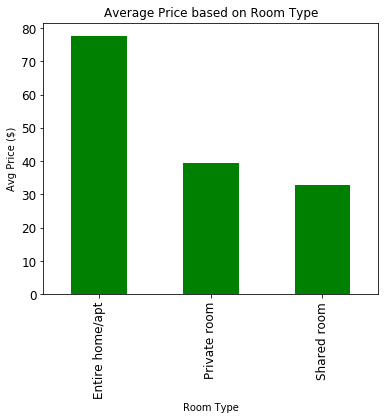

In [41]:
# Plotting the average price by room type

avg_price_roomtype.plot(kind='bar', color='green', figsize = (6,5), fontsize = 12)
plt.title('Average Price based on Room Type')
plt.xlabel('Room Type')
plt.ylabel('Avg Price ($)')
plt.show()

From the above graph, it is evident that the **Entire home/apt** has the highest average price. So we can consider this for taking into our model later.

Let us investigate the *price* column since this will be our main target feature later on

In [28]:
df_revised_columns['price'].describe()

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

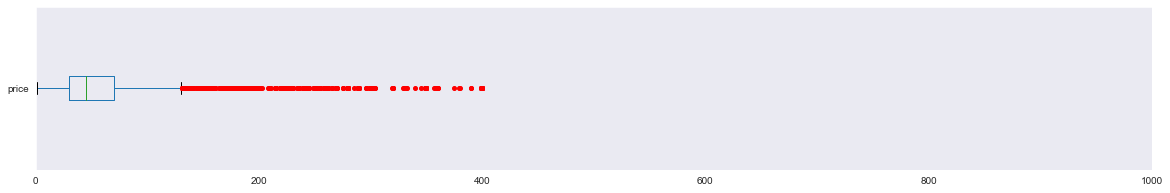

In [60]:
flierprops = dict(marker='.', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='r')
df_revised_columns['price'].plot(kind='box', xlim = (0 , 1000), vert=False, figsize = (20,3) , flierprops = flierprops )

From the above boxplot, it is quite evident that 75% of the prices are less than €70 and the mean price is around €67 . But the maximum price showing here is €9000. Also, there are many outliers which seems to fade slowly after €400. Also, there are prices set to zero, which is odd. So we can drop all the outliers after 400 and also which are set to 0.

In [30]:
df_revised_columns.drop(df_revised_columns[(df_revised_columns['price'] > 400) | (df_revised_columns['price'] == 0)].index, axis=0, inplace=True)

In [31]:
df_revised_columns['price'].describe()

count    22441.000000
mean        57.584377
std         42.162006
min          1.000000
25%         30.000000
50%         45.000000
75%         70.000000
max        400.000000
Name: price, dtype: float64

Check for the missing values

In [32]:
df_revised_columns.isna().sum()

space                            8503
description                       202
host_has_profile_pic               25
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          32
bedrooms                           18
bed_type                            0
amenities                           0
square_feet                     21996
price                               0
cleaning_fee                        0
security_deposit                    0
extra_people                        0
guests_included                     0
minimum_nights                      0
instant_bookable                    0
is_business_travel_ready            0
cancellation_policy                 0
host_is_superhost                  25
Total_price                         0
dtype: int64

We can try to set price ranges on how the listings have been setting the prices. It will be a useful visualization to see.

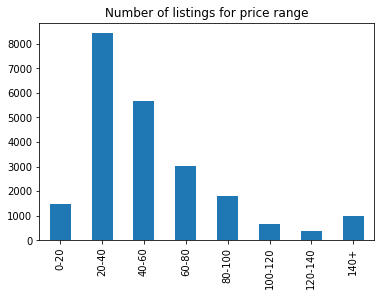

In [33]:
# Creating price range column
price_range = pd.cut(df_revised_columns['price'], 
                     bins=[0, 20, 40, 60, 80, 100, 120, 140, df_revised_columns["price"].max()], 
                     labels=["0-20", "20-40", "40-60", "60-80", "80-100", "100-120", "120-140", "140+"])
df_revised_columns['price_range'] = price_range 
df_revised_columns['price_range'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of listings for price range')
plt.show()

In [34]:
df_revised_columns['bed_type'].value_counts()

Real Bed         21659
Pull-out Sofa      449
Futon              240
Couch               70
Airbed              23
Name: bed_type, dtype: int64

Since almost 90% of beds are Real bed, this may not have much significant impact on price.

## Host impact

In [65]:
df_revised_columns.host_is_superhost.unique()

array(['t', 'f', nan], dtype=object)

In [64]:
df_revised_columns.host_has_profile_pic.unique()

array(['t', 'f', nan], dtype=object)

In [49]:
avg_price_hostissuperhost= df_revised_columns.groupby(['host_is_superhost'])['price'].agg(np.mean)
avg_price_hostissuperhost

host_is_superhost
f    56.488907
t    64.804617
Name: price, dtype: float64

In [68]:
df_revised_columns['host_is_superhost'].isna().sum()

25

In [69]:
df_revised_columns['host_has_profile_pic'].isna().sum()

25

In [70]:
# replace host_has_profile_pic Nan's with no/false

df_revised_columns['host_has_profile_pic'].fillna(value='f', inplace=True)
df_revised_columns['host_has_profile_pic'].unique()

array(['t', 'f'], dtype=object)

In [72]:
# replace host_is_superhost Nan's with same as above with no/false

df_revised_columns['host_is_superhost'].fillna(value='f', inplace=True)
df_revised_columns['host_is_superhost'].unique()

array(['t', 'f'], dtype=object)

In [74]:
df_revised_columns['host_is_superhost'] = df_revised_columns['host_is_superhost'].map({'t':1, 'f':0})

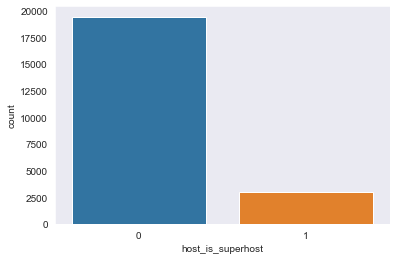

In [75]:
sns.countplot(x='host_is_superhost', data = df_revised_columns)

In [76]:
df_revised_columns['host_has_profile_pic'] = df_revised_columns['host_has_profile_pic'].map({'t':1, 'f':0})

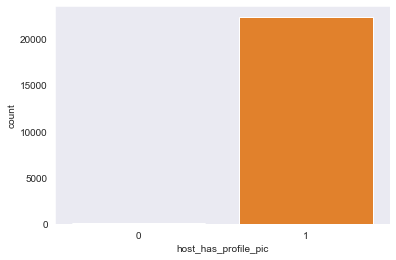

In [77]:
sns.countplot(x='host_has_profile_pic', data = df_revised_columns)

We are yet to make sure that the above two columns have any significance on average pricing in the neighbourhood. 

In [88]:
# Writing a function to convert the columns into 0's and 1's for our model, if we use, from boolean type t or f

def booltonum(value):
    if value == 't' or value == 'T':
        return 1
    else:
        return 0

bool_cols= ['is_business_travel_ready', 'host_is_superhost']
    
for i in bool_cols:
    df_revised_columns[i] = df_revised_columns[i].apply(booltonum)